# Cleaning and Preparing Data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data sets
deposit = pd.read_csv('deposit_data.csv')
client = pd.read_csv('client_data.csv')
calendar = pd.read_csv('calendar_data.csv')

In [3]:
# read data and find any missing values
deposit.info()
deposit.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480394 entries, 0 to 480393
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   client_id        480394 non-null  int64  
 1   deposit_type     480394 non-null  object 
 2   deposit_amount   480394 non-null  float64
 3   deposit_cadence  480394 non-null  object 
 4   deposit_date     480394 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.3+ MB


,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [4]:
client.info()
client.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46347 entries, 0 to 46346
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   client_id                   46347 non-null  int64 
 1   client_geographical_region  46347 non-null  object
 2   client_residence_status     46347 non-null  object
 3   client_age                  46347 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [5]:
calendar.info()
calendar.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gregorian_date  153 non-null    object
 1   month_name      153 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB


,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


In [6]:
# merge all datasets
deposit_client = pd.merge(deposit, client, on='client_id', how='left')
df = pd.merge(deposit_client, calendar, left_on='deposit_date', right_on='gregorian_date', how='left')
df.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,gregorian_date,month_name
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,West,Rent,53,2019-10-23,Month 5
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,West,Rent,53,2019-09-23,Month 4
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,West,Rent,53,2019-09-23,Month 4
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,West,Rent,53,2019-10-23,Month 5
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,West,Rent,53,2019-06-23,Month 1


In [7]:
# drop extra date column
df.drop(columns=['gregorian_date'], inplace=True)

In [8]:
# convert date column to date time
df['deposit_date'] = pd.to_datetime(df['deposit_date'])

In [9]:
df.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,West,Rent,53,Month 1


In [10]:
df.shape

(480394, 9)

# Explore Categorical and Numerical Data

In [11]:
# there are two deposit types
df['deposit_type'].value_counts()

deposit_type
Scheduled Deposit    247986
Actual Deposit       232408
Name: count, dtype: int64

In [12]:
# three types of deposit_cadence
df['deposit_cadence'].value_counts()

deposit_cadence
Monthly     262858
Biweekly    209189
Extra         8347
Name: count, dtype: int64

In [13]:
# there are four regions
df['client_geographical_region'].value_counts()

client_geographical_region
West         205629
South        108004
Midwest       88185
Northeast     78576
Name: count, dtype: int64

In [14]:
# two types of residential status
df['client_residence_status'].value_counts()

client_residence_status
Own     345432
Rent    134962
Name: count, dtype: int64

In [15]:
# age range is 21 to 105
df['client_age'].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

In [16]:
# date range from 2019/06/01 to 2019/10/31
df['deposit_date'].min(), df['deposit_date'].max()

(Timestamp('2019-06-01 00:00:00'), Timestamp('2019-10-31 00:00:00'))

<Axes: ylabel='Frequency'>

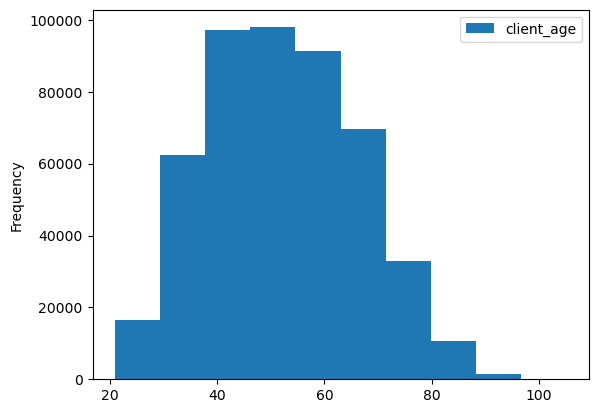

In [17]:
# age distribution of all clients
df[['client_age']].plot(kind='hist')

# Analysis

Text(0, 0.5, 'Amount')

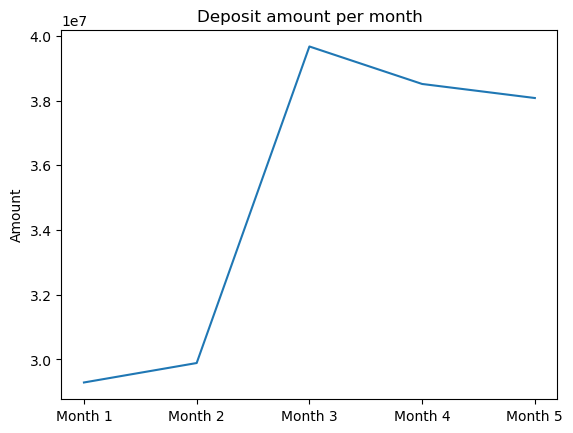

In [18]:
# calculate and visualise total deposit amount per month
monthly_deposit_amount = df.groupby('month_name')['deposit_amount'].sum()

plt.plot(monthly_deposit_amount)
plt.title('Deposit amount per month')
plt.ylabel('Amount')

In [19]:
# largest change in monthly deposit sum occured throughout month 2 (July)
monthly_deposit_amount

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64

Text(0, 0.5, 'Amount')

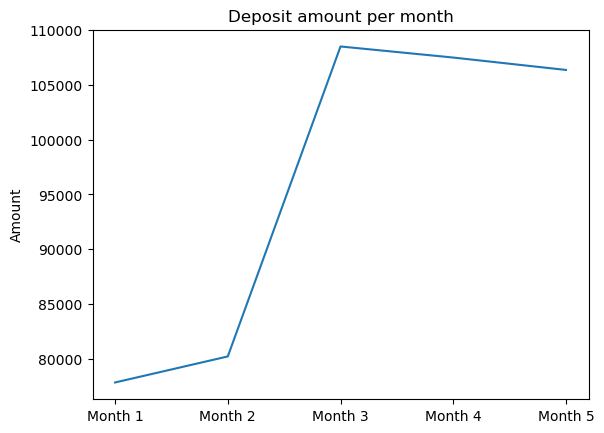

In [20]:
# deposit count per month
monthly_deposit_count = df.groupby('month_name')['deposit_amount'].size()

plt.plot(monthly_deposit_count)
plt.title('Deposit amount per month')
plt.ylabel('Amount')

In [21]:
# largest change in total transactions occured throughout month 2 (July)
monthly_deposit_count

month_name
Month 1     77827
Month 2     80205
Month 3    108505
Month 4    107494
Month 5    106363
Name: deposit_amount, dtype: int64

Text(0, 0.5, 'Amount')

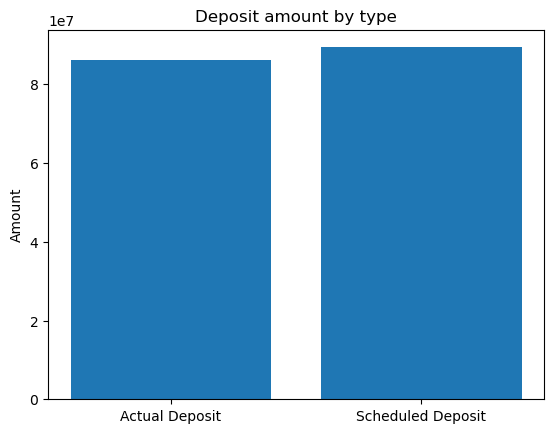

In [22]:
# deposit amount by type
deposit_amount_by_type = df.groupby('deposit_type')['deposit_amount'].sum()

plt.bar(deposit_amount_by_type.index, deposit_amount_by_type)
plt.title('Deposit amount by type')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

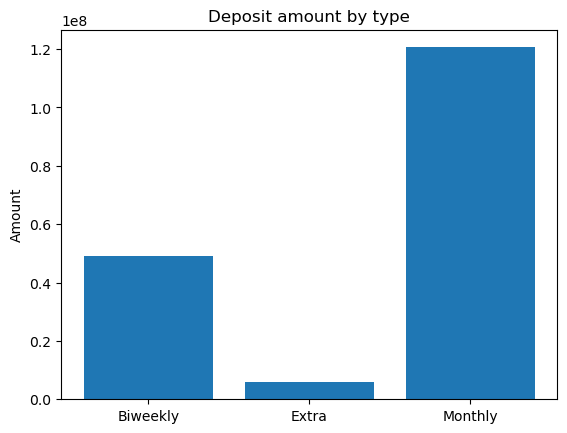

In [23]:
# deposit amount by candence
deposit_amount_by_cadence = df.groupby('deposit_cadence')['deposit_amount'].sum()

plt.bar(deposit_amount_by_cadence.index, deposit_amount_by_cadence)
plt.title('Deposit amount by type')
plt.ylabel('Amount')

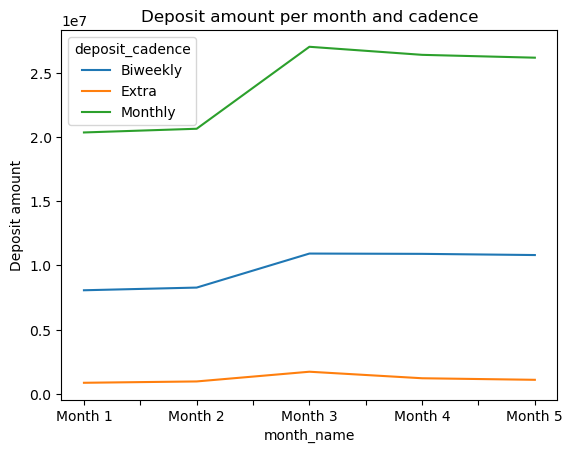

In [24]:
# deposit amount by cadence and month
tmp_df = df.groupby(by=[df['deposit_cadence'], df['month_name']])['deposit_amount'].sum()

tmp_df.unstack(level=0).plot(kind='line')
plt.title('Deposit amount per month and cadence')
plt.ylabel('Deposit amount')
plt.show()

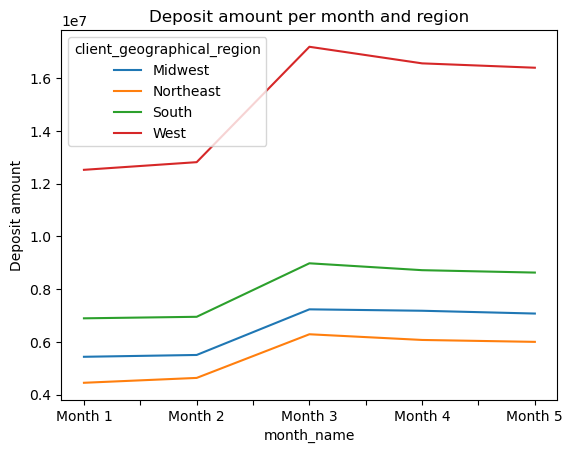

In [25]:
# deposit amount by geographical region and month
tmp_df = df.groupby(by=[df['client_geographical_region'], df['month_name']])['deposit_amount'].sum()

tmp_df.unstack(level=0).plot(kind='line')
plt.title('Deposit amount per month and region')
plt.ylabel('Deposit amount')
plt.show()

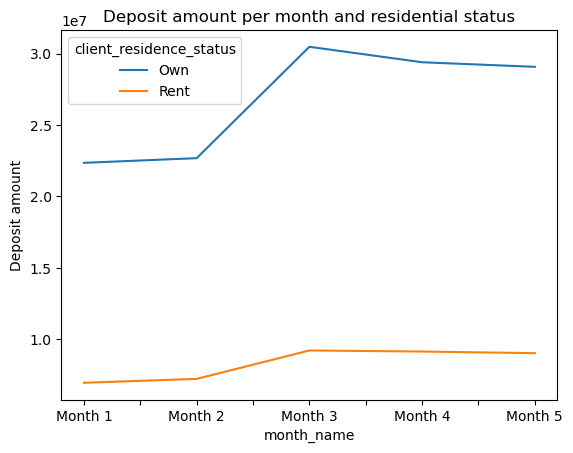

In [26]:
# deposit amount by residential status and month
tmp_df = df.groupby(by=[df['client_residence_status'], df['month_name']])['deposit_amount'].sum()

tmp_df.unstack(level=0).plot(kind='line')
plt.title('Deposit amount per month and residential status')
plt.ylabel('Deposit amount')
plt.show()

**[Question 1]**

**Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?**

- During the month that the campaign was running, Freedom Debt Relief recieved an almost 10 million dollar increase in deposit amounts than the previous two months.
- In the months following the campaign, the toal deposit amount starts to slowly decrease, but remains at a level much higher than pre-campaign: 8.5 million dollars in month 4 and 8 million dollars in month 5.
- We know from the task description that the campaign cost was 5 million dollars. By summing the above numbers we can see that deposits increased by roughly 26.5 million dollars during and after the campaign.
- However, according to Freedom Debt Relief the fee range of enrolled debt is between 15% and 25%, resulting in a minimum gross profit of 3.975 million dollars.
- This results in an estimated net loss of 1.025 million dollars against the 5 million dollar campaign budget.

In [27]:
# clients who have made any deposits in the first two months (pre-campaign)
clients_before_campaign = df[(df['month_name'] == 'Month 1') |
                             (df['month_name'] == 'Month 2')]['client_id'].unique()
len(clients_before_campaign)

34051

In [28]:
# clients who have made any deposits in the third month (campaign)
clients_during_campaign = df[(df['month_name'] == 'Month 3')]['client_id'].unique()
len(clients_during_campaign)

43806

In [29]:
# clients who have made any deposits after the campaign
clients_after_campaign = df[(df['month_name'] == 'Month 4') |
                             (df['month_name'] == 'Month 5')]['client_id'].unique()
len(clients_after_campaign)

41862

In [30]:
# convert arrays to sets, and find difference
print('New clients during campaign:', len(set(clients_during_campaign).difference(set(clients_before_campaign))))
print('New clients after campaign:', len(set(clients_after_campaign).difference(set(clients_before_campaign).union(set(clients_during_campaign)))))
print('Note: Results may not be reliable as new customers may have deposited before month 1')

New clients during campaign: 11544
New clients after campaign: 752
Note: Results may not be reliable as new customers may have deposited before month 1


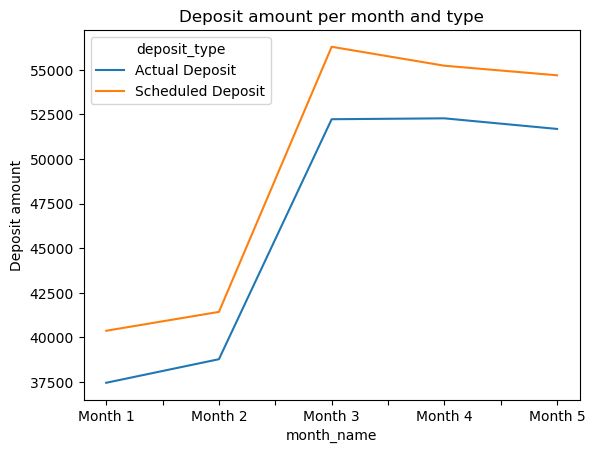

In [31]:
# determine how number of actual and scheduled deposits changed
tmp_df = df.groupby(by=[df['deposit_type'], df['month_name']])['deposit_type'].count()

tmp_df.unstack(level=0).plot(kind='line')
plt.title('Deposit amount per month and type')
plt.ylabel('Deposit amount')
plt.show()

In [32]:
# categorise age column
def discretise_age(row):
    return int (row.client_age / 10)

In [33]:
df1 = df.copy(deep=True)
df1['age_group'] = df1.apply(discretise_age, axis=1)
df1.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date,client_geographical_region,client_residence_status,client_age,month_name,age_group
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5,5
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4,5
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23,West,Rent,53,Month 4,5
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23,West,Rent,53,Month 5,5
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23,West,Rent,53,Month 1,5


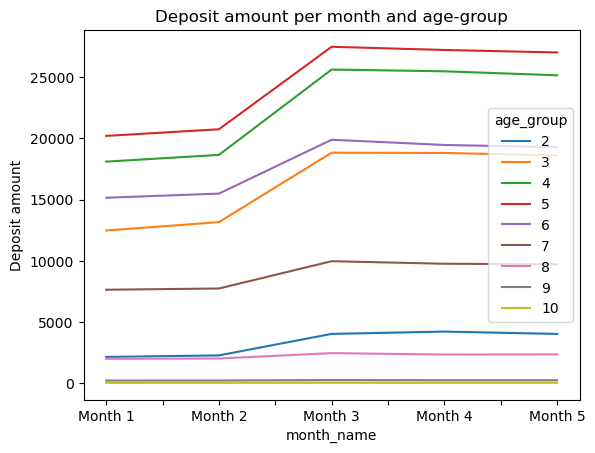

In [34]:
# determine how deposits changed by age-group
tmp_df = df1.groupby(by=[df1['age_group'], df1['month_name']]).size()

tmp_df.unstack(level=0).plot(kind='line')
plt.title('Deposit amount per month and age-group')
plt.ylabel('Deposit amount')
plt.show()

In [35]:
# new dataframe containing the three largest age groups 
df_q2 = df[(df['client_residence_status'] == 'Own') &
           (df['client_age'] <= 60) &
           (df['client_age'] >= 40)]
df_q2.shape

(181068, 9)

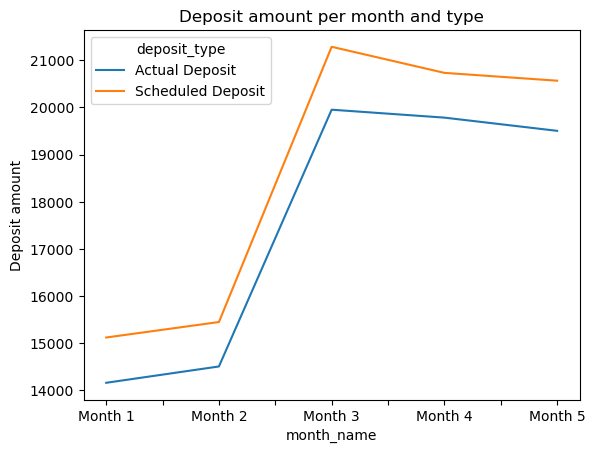

In [36]:
# determine how number of actual and scheduled deposits changed between clients aged between 40 and 60
tmp_df = df_q2.groupby(by=[df_q2['deposit_type'], df_q2['month_name']])['deposit_type'].count()

tmp_df.unstack(level=0).plot(kind='line')
plt.title('Deposit amount per month and type')
plt.ylabel('Deposit amount')
plt.show()

In [37]:
# calculate ratio of subgroup depositing more than scheduled monthly or biweekly deposits
extra_deposit_df_q2 = df_q2[df_q2['deposit_cadence'] == 'Extra']['deposit_amount'].sum()
extra_deposit_df = df[df['deposit_cadence'] == 'Extra']['deposit_amount'].sum()
extra_deposit_df_q2 / extra_deposit_df

0.4234867523021419

In [38]:
# extra deposit ratio decreases when measured against all age groups
df_q2.shape[0] / df.shape[0]

0.3769156150992727

In [39]:
# no statistical significance here as results are similar to results of all deposit cadences
df[df['deposit_cadence'] == 'Extra']['client_geographical_region'].value_counts(normalize=True)

client_geographical_region
West         0.427699
South        0.238529
Midwest      0.178028
Northeast    0.155745
Name: proportion, dtype: float64

In [40]:
# clients depositing extra are roughly 2.3 times more likely to be a homeowner
df[df['deposit_cadence'] == 'Extra']['client_residence_status'].value_counts(normalize=True)

client_residence_status
Own     0.701569
Rent    0.298431
Name: proportion, dtype: float64

**[Question 2]**

**Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?**

Some potential recommendations:

- Target middle-aged customers (between 40 and 60)
- Target homeowners
- Run campaign for a longer period of time, to encourage clients to make more extra deposits

In [41]:
# make a copy of the deposit data to be able to simulate the postponement
# without messing up the original data set
df2 = df.copy(deep=True)

In [42]:
# create a set of client_id's that are considered 'new', that were aquired during the campaign
new_clients = set(clients_during_campaign).difference(set(clients_before_campaign))

In [46]:
import datetime

In [48]:
def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == 'Month 3':
            row.month_name = 'Month 6'
        elif row.month_name == 'Month 4':
            row.month_name = 'Month 7'
        elif row.month_name == 'Month 5':
            row.month_name = 'Month 8'
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row

In [49]:
# axis=1 applies function we provide row-wise, axis=0 does it column=-wise
df2 = df2.apply(func=simulate_campaign_postponement, axis=1)
df2['deposit_date'].max()

Timestamp('2020-01-29 00:00:00')

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


Text(0, 0.5, 'Deposit amount')

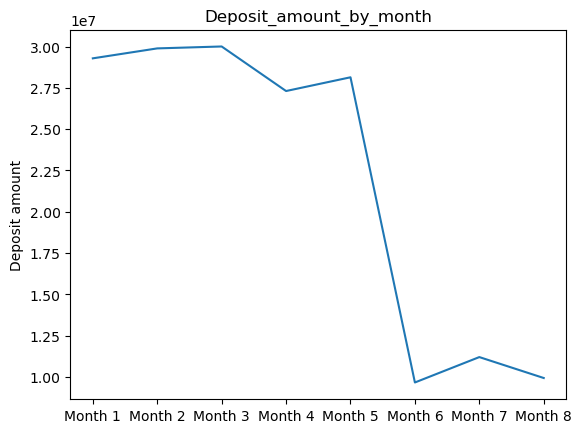

In [50]:
deposit_amount_by_month = df2.groupby(by=df2['month_name'])['deposit_amount'].sum()
print('Deposit amount per month', deposit_amount_by_month)

plt.plot(deposit_amount_by_month)
plt.title('Deposit_amount_by_month')
plt.ylabel('Deposit amount')

In [51]:
# calculate average monthly deposit
avg_monthly_deposit = (df2.groupby(by=df2['month_name'])['deposit_amount'].sum()).mean()
avg_monthly_deposit

21930414.27375

In [56]:
# add the average monthly deposit estimate to the simulated months
deposit_amount_by_month.at['Month 6'] += avg_monthly_deposit
deposit_amount_by_month.at['Month 7'] += avg_monthly_deposit
deposit_amount_by_month.at['Month 8'] += avg_monthly_deposit

Deposit amount per month month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


Text(0, 0.5, 'Deposit amount')

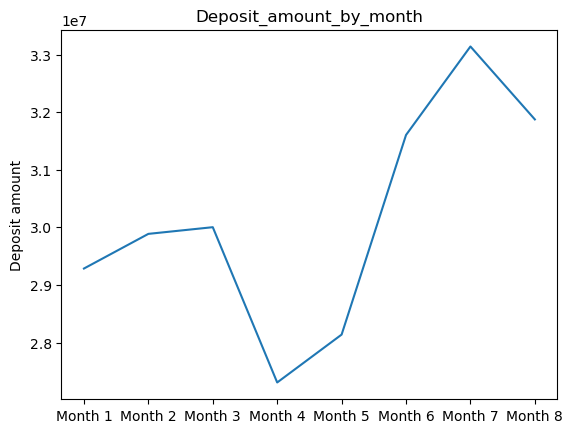

In [58]:
print('Deposit amount per month', deposit_amount_by_month)

plt.plot(deposit_amount_by_month)
plt.title('Deposit_amount_by_month')
plt.ylabel('Deposit amount')

**[Question 3]**

**How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.**

- During the month of the campaign Freedom received an almost 2.5 million dollar increase in deposit amounts than the previous months. This is a pretty small increase when compared to the 10 million we found in question 1
- In the month following the campaign the total deposit amount continues to increase to its maximum at 33 million dollars before dropping to 31 million dollars in the last month
- In this new scenario, we can calculate that the campaign resulted in a rough increase of 8 million dollars in deposits. In question 1 this number was much higher at 26.5 million. Bringing back the cost of the campaign at 5 million dollars we calculated that the original campaign was borderline profitable. Given out simulation of the scenario it's pretty clear that postponing the campaign would not have been the right choice.